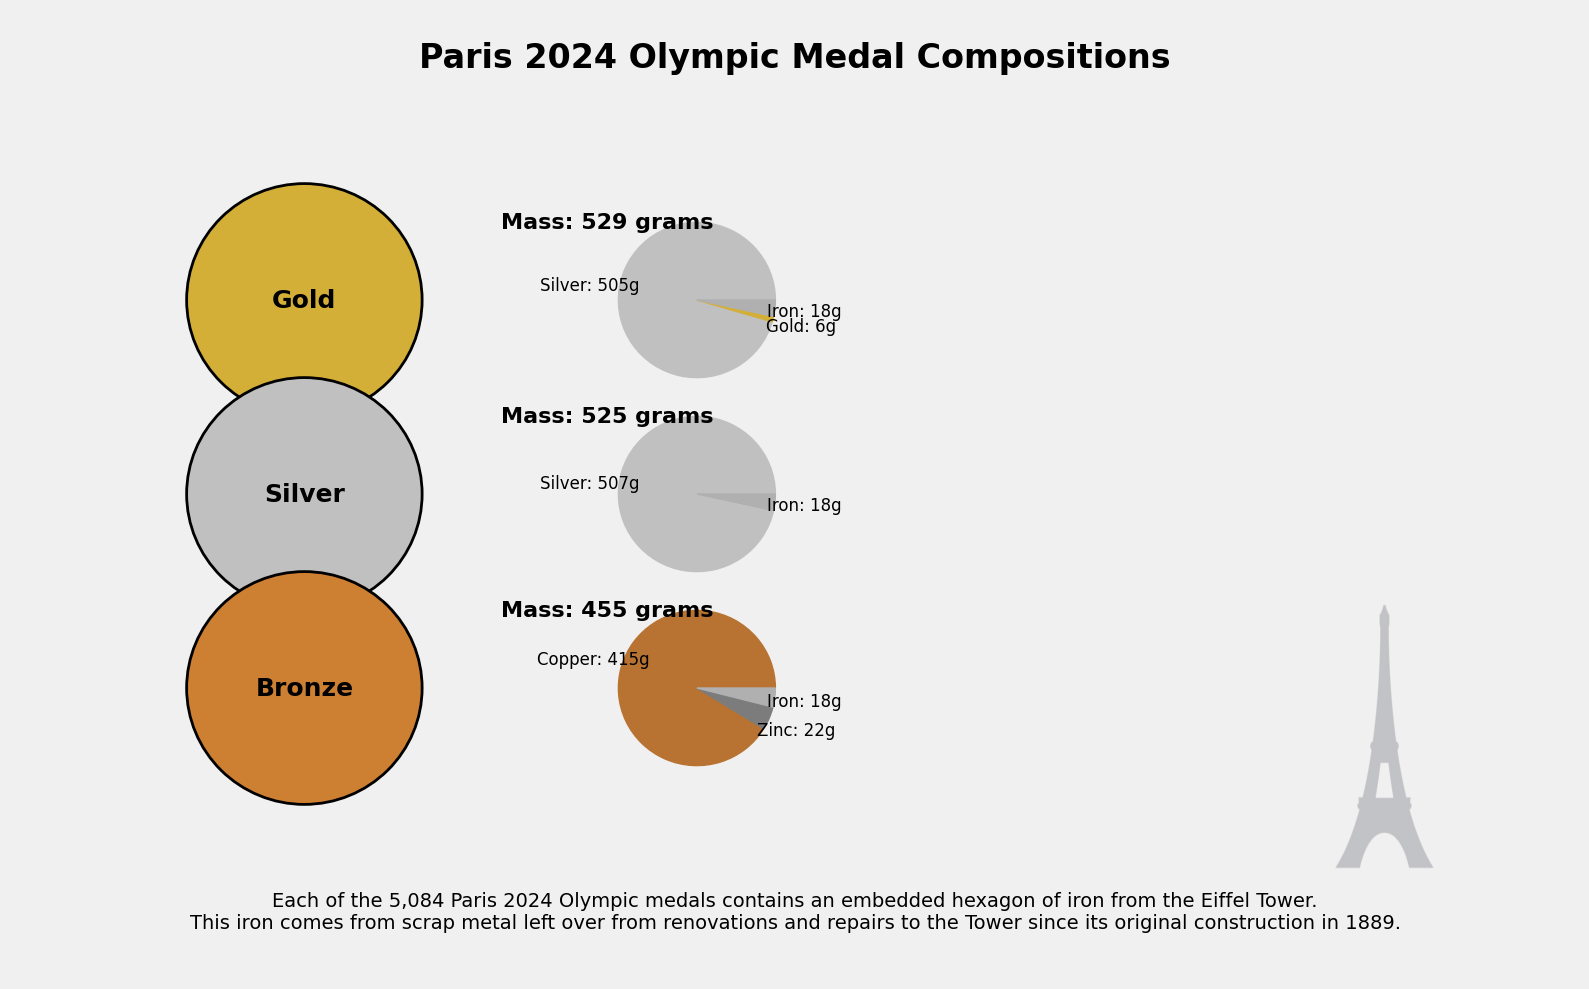

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define the data
medal_data = {
    'Gold': {'Mass': 529, 'Silver': 505, 'Gold': 6, 'Iron': 18},
    'Silver': {'Mass': 525, 'Silver': 507, 'Iron': 18},
    'Bronze': {'Mass': 455, 'Copper': 415, 'Zinc': 22, 'Iron': 18}
}

# Define colors
colors = {
    'Gold': '#D4AF37', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32',
    'Iron': '#B0B0B0', 'Copper': '#B87333', 'Zinc': '#7C7C7C'
}

# Create the figure
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#F0F0F0')

# Set up the layout
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.axis('off')

# Add title
ax.text(8, 9.5, 'Paris 2024 Olympic Medal Compositions', fontsize=24, ha='center', va='center', fontweight='bold')

# Medal positions
positions = {'Gold': 7, 'Silver': 5, 'Bronze': 3}

# Add medals and information
for medal, y_center in positions.items():
    # Medal circle
    circle = patches.Circle((3, y_center), 1.2, color=colors[medal], ec='black', linewidth=2, zorder=10)
    ax.add_patch(circle)
    ax.text(3, y_center, medal, fontsize=18, ha='center', va='center', color='black', fontweight='bold', zorder=11)
    
    # Medal mass
    ax.text(5, y_center + 0.8, f'Mass: {medal_data[medal]["Mass"]} grams', fontsize=16, ha='left', va='center', fontweight='bold')

    # Add composition details as pie chart
    composition = {k: v for k, v in medal_data[medal].items() if k != 'Mass'}
    total = sum(composition.values())
    angles = [v/total * 2 * np.pi for v in composition.values()]
    
    pie_center = (7, y_center)
    radius = 0.8
    
    start_angle = 0
    for material, angle in zip(composition.keys(), angles):
        end_angle = start_angle + angle
        wedge = patches.Wedge(pie_center, radius, np.degrees(start_angle), np.degrees(end_angle), 
                              color=colors.get(material, 'gray'))
        ax.add_patch(wedge)
        
        # Add material labels
        midangle = (start_angle + end_angle) / 2
        x = pie_center[0] + (radius + 0.3) * np.cos(midangle)
        y = pie_center[1] + (radius + 0.3) * np.sin(midangle)
        ax.text(x, y, f'{material}: {composition[material]}g', ha='center', va='center', fontsize=12)
        
        start_angle = end_angle

# Add footer
footer_text = ('Each of the 5,084 Paris 2024 Olympic medals contains an embedded hexagon of iron from the Eiffel Tower.\n'
               'This iron comes from scrap metal left over from renovations and repairs to the Tower since its original construction in 1889.')
ax.text(8, 0.7, footer_text, fontsize=14, ha='center', va='center', wrap=True)

# Add Eiffel Tower silhouette
eiffel_tower = plt.imread('effiel.png')  # Replace with actual Eiffel Tower silhouette image
ax.imshow(eiffel_tower, extent=[13, 15, 1, 4], aspect='auto', alpha=0.2)

plt.tight_layout()
plt.show()